# **SMAI Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## _Problem - 4.2_

Utils

In [4]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [5]:
csv_path = "../Datasets/SMAI-Dataset-problem-4.2/CSV/TLBR_{}.csv"
image_folder_path = "../Datasets/SMAI-Dataset-problem-4.2/images/"

In [6]:
def visualize_bboxes(img, bboxes):
    img_2 = img.copy()
    for index, rows in enumerate(bboxes):
        top_left = (int(rows[1].split(',')[0][1:]),int(rows[1].split(',')[1][:-1]))
        bottom_right = (int(rows[2].split(',')[0][1:]),int(rows[2].split(',')[1][:-1]))
        # print(top_left)
        cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

    plt.imshow(img_2)


In [7]:
def make_connections(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_with_boxes = image_rgb.copy()

    for index, row in euclidean.iterrows():
        left = int(row['Left'][0])
        right = int(row['Right'][0])
        top = int(row['Top'][1])
        bottom = int(row['Bottom'][1])
        box_id = int(row['Id'])

        width = right - left
        height = bottom - top

        top_left = (left, top)
        bottom_right = (right, bottom)

        cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

        label_position = (left, top - 10)
        cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        top_adjacent_id = int(row['Top_Box'][1])
        bottom_adjacent_id = int(row['Bottom_Box'][1])
        left_adjacent_id = int(row['Left_Box'][1])
        right_adjacent_id = int(row['Right_Box'][1])

        if top_adjacent_id != 0:
            top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
            top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
            cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

        if bottom_adjacent_id != 0:
            bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
            bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
            cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

        if left_adjacent_id != 0:
            left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
            left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
            cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

        if right_adjacent_id != 0:
            right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
            right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
            cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

    return image_with_boxes

Main Code

In [29]:
# Load Dataset Images
dataset_images = []
dataset_bboxes = []

if os.path.exists(image_folder_path) and os.path.isdir(image_folder_path):
    # Get a list of all files in the directory
    file_list = os.listdir(image_folder_path)
    file_list.sort()

    # Read all images & CSVs
    for file in file_list:
        image = cv2.imread(image_folder_path + file)
        image = np.array(image)
        dataset_images.append(image)

        csv = pd.read_csv(csv_path.format(file.split('.')[0]))
        csv = csv.to_numpy()
        dataset_bboxes.append(csv)

print(len(dataset_images), len(dataset_bboxes))

10 10


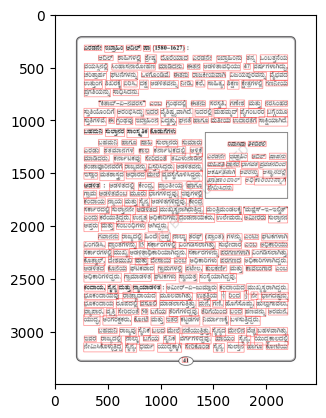

In [9]:
visualize_bboxes(dataset_images[0], dataset_bboxes[0])

In [10]:
centroids = []

for index, rows in enumerate(dataset_bboxes[0]):
    top_left = (int(rows[1].split(',')[0][1:]),int(rows[1].split(',')[1][:-1]))
    bottom_right = (int(rows[2].split(',')[0][1:]),int(rows[2].split(',')[1][:-1]))
    centroids.append([(top_left[0] + bottom_right[0]) // 2, (top_left[1] + bottom_right[1]) // 2])

centroids = np.array(centroids)
print(centroids.shape)

(261, 2)


In [11]:
# Initialize variables to store the best parameters and silhouette score
best_linkage = None
best_distance_metric = None
best_n_clusters = 0
best_silhouette_score = -1

# Range of values to explore for linkage and distance metric
linkage_methods = ["single", "complete", "average"]
distance_metrics = ["euclidean", "manhattan"]

# Range of values to explore for the number of clusters
n_clusters_values = range(2, 10)

In [12]:
for l in linkage_methods:
    for metric in distance_metrics:
        for n_clusters in n_clusters_values:
            clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=l, metric=metric)
            labels = clustering.fit_predict(centroids)
            
            # Check if all points are in a single cluster (no meaningful clustering)
            if len(set(labels)) <= 1:
                continue
            
            silhouette = silhouette_score(centroids, labels)
            
            # Update best parameters if silhouette score is better
            if silhouette > best_silhouette_score:
                best_linkage = l
                best_distance_metric = metric
                best_n_clusters = n_clusters
                best_silhouette_score = silhouette

print("Best parameters: linkage={}, distance metric={}, n_clusters={}".format(best_linkage, best_distance_metric, best_n_clusters))

Best parameters: linkage=average, distance metric=manhattan, n_clusters=2


(33930,)
62.0
67.0
74.0
76.0
77.0
78.0
80.0
82.0
83.0
84.0
89.0
90.0
91.0
92.0
93.0
94.0
97.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
121.0
122.0
123.0
124.0
125.0
126.0
126.5
128.0
130.0
131.0
134.0
135.0
136.0
138.5
141.5
142.0
143.0
144.0
144.5
145.0
146.0
146.5
149.0
149.5
150.0
151.0
151.5
152.5
153.0
153.5
154.0
156.0
157.0
158.5
159.0
160.0
161.0
161.5
163.0
164.0
165.0
166.5
169.0
170.0
174.0
176.0
177.0
178.0
179.0
180.5
182.0
182.5
184.0
185.0
187.0
189.5
194.5
195.5
196.0
197.0
198.0
199.0
200.0
202.0
203.5
208.5
209.5
209.66666666666666
210.0
211.0
211.33333333333334
212.5
214.0
215.0
215.16666666666669
216.0
217.0
217.33333333333334
219.33333333333334
221.0
222.33333333333334
224.5
226.0
228.7777777777778
230.5
232.16666666666666
240.5
241.0
245.5
255.83333333333331
258.5
261.5
263.77777777777777
264.16666666666663
264.5
264.6666666666667
265.0
268.0
269.7
272.25
276.4444444444444
276.5
286.3333

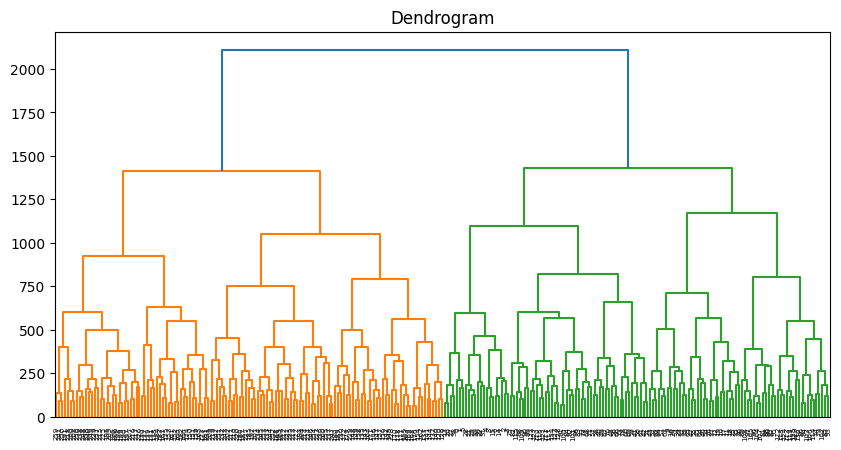

In [17]:
if best_distance_metric=="manhattan":
    best_distance_metric="cityblock"

# Perform hierarchical clustering
Z = linkage(centroids, 
            method=best_linkage, 
            metric=best_distance_metric)

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
dendrogram(Z)

# Calculate cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(centroids))
coph_dists.sort()
print(coph_dists.shape)

for i in np.unique(coph_dists):
    print(i)

# Calculate the horizontal and vertical Euclidean distance thresholds
horizontal_threshold = np.percentile(coph_dists, 30)  # Adjust the percentile as needed
vertical_threshold = np.percentile(coph_dists, 80)    # Adjust the percentile as needed

print(f"Horizontal Euclidean Distance Threshold: {horizontal_threshold}")
print(f"Vertical Euclidean Distance Threshold: {vertical_threshold}")

In [34]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock  # Import the distance metrics you need

def calculate_distance(coord1, coord2, metric="euclidean"):
    if metric == "euclidean":
        return euclidean(coord1, coord2)
    elif metric == "cityblock":
        return cityblock(coord1, coord2)
    else:
        raise ValueError("Unsupported distance metric")

def combine_bboxes(bboxes, horizontal_threshold, vertical_threshold, distance_metric="euclidean"):
    combined_bboxes = []  # List to store the combined bounding boxes
    
    # Create a list to keep track of whether a bounding box has been combined
    bbox_combined = [False] * len(bboxes)
    
    for i, bbox1 in enumerate(bboxes):
        if bbox_combined[i]:
            continue  # Skip this bbox if it has already been combined

        bbox_id1 = bbox1[3]
        top_left1 = (int(bbox1[1].split(',')[0][1:]),int(bbox1[1].split(',')[1][:-1]))
        bottom_right1 = (int(bbox1[2].split(',')[0][1:]),int(bbox1[2].split(',')[1][:-1]))
        
        # Initialize variables for the combined bounding box
        combined_top_left = top_left1
        combined_bottom_right = bottom_right1
        
        for j, bbox2 in enumerate(bboxes):
            if i == j or bbox_combined[j]:
                continue  # Skip the same bbox or ones that have been combined
            
            bbox_id2 = bbox2[3]
            top_left2 = (int(bbox2[1].split(',')[0][1:]),int(bbox2[1].split(',')[1][:-1]))
            bottom_right2 = (int(bbox2[2].split(',')[0][1:]),int(bbox2[2].split(',')[1][:-1]))
            
            # Calculate the distance between the two bbox centroids using the specified metric
            distance = calculate_distance(
                ((top_left1[0] + bottom_right1[0]) / 2, (top_left1[1] + bottom_right1[1]) / 2),
                ((top_left2[0] + bottom_right2[0]) / 2, (top_left2[1] + bottom_right2[1]) / 2),
                metric=distance_metric
            )
            
            # If the distance is below the thresholds, combine the bboxes
            if distance <= horizontal_threshold:
                combined_top_left = (
                    min(combined_top_left[0], top_left2[0]),
                    min(combined_top_left[1], top_left2[1])
                )
                combined_bottom_right = (
                    max(combined_bottom_right[0], bottom_right2[0]),
                    max(combined_bottom_right[1], bottom_right2[1])
                )
                bbox_combined[j] = True  # Mark bbox2 as combined
            
        # Add the combined bbox to the list
        combined_bbox = (combined_top_left, combined_bottom_right, bbox_id1)
        combined_bboxes.append(combined_bbox)
    
    return combined_bboxes

In [48]:
def format_bounding_boxes(combined_bboxes):
    formatted_bboxes = []
    for bbox in combined_bboxes:
        top_left, bottom_right, bbox_id = bbox
        formatted_bbox = [int(bbox_id), f"[{int(top_left[0])}, {int(top_left[1])}]", f"[{int(bottom_right[0])}, {int(bottom_right[1])}]", int(bbox_id)]
        formatted_bboxes.append(formatted_bbox)
    return formatted_bboxes

In [49]:
# bbox_new = combine_bboxes(dataset_bboxes[0], horizontal_threshold, vertical_threshold, distance_metric="euclidean")
# bbox_new = np.array(format_bounding_boxes(bbox_new))

In [50]:
# bbox_new, dataset_bboxes[0]

(array([['0', '[271, 294]', '[1762, 1747]', '0'],
        ['11', '[1010, 386]', '[2199, 1747]', '11'],
        ['112', '[273, 1596]', '[2202, 3049]', '112'],
        ['200', '[665, 2632]', '[2204, 3295]', '200'],
        ['219', '[271, 2844]', '[771, 3199]', '219']], dtype='<U21'),
 array([[0, '[276, 294]', '[442, 345]', 0],
        [1, '[469, 297]', '[645, 362]', 1],
        [2, '[672, 294]', '[812, 345]', 2],
        ...,
        [258, '[1815, 3110]', '[1963, 3172]', 258],
        [259, '[1994, 3097]', '[2199, 3172]', 259],
        [260, '[1201, 3250]', '[1247, 3295]', 260]], dtype=object))

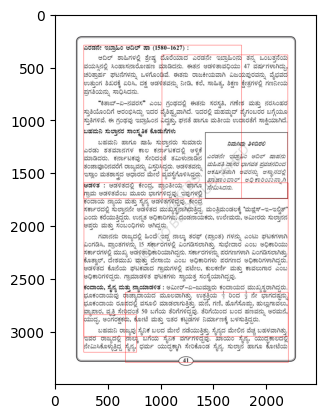

In [51]:
# visualize_bboxes(dataset_images[0], bbox_new)